<a href="https://colab.research.google.com/github/KubatyM129/Learning_PyTorch_and_ML/blob/main/Second%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
from sklearn.datasets import make_circles

number_of_samples = 1000

X, y = make_circles(number_of_samples, noise=0.03, random_state=42)

circles = pd.DataFrame({"X1:": X[:,0], "X2": X[:,1], "label": y})
circles.head(20)

,X1:,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


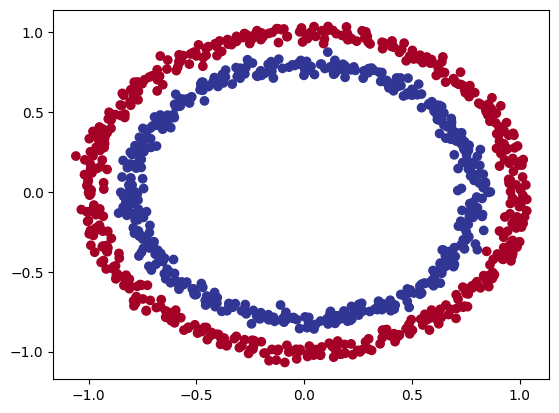

In [2]:
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [3]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

In [16]:
# Model V2
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=16)
    self.layer_2 = nn.Linear(in_features=16, out_features=8)
    self.layer_3 = nn.Linear(in_features=8, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.layer_2(self.relu(self.layer_1(x))))


model_0 = CircleModelV2().to(device)


In [17]:
with torch.inference_mode():
  untrained_predictions = model_0(X_test.to(device))

In [18]:
# Loss function
loss_fn = nn.BCEWithLogitsLoss()

optimizer =  torch.optim.SGD(model_0.parameters(), 0.1)

In [19]:
# Accuracy calculation
def accuracy_function(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  accuracy = (correct/len(y_pred))*100
  return accuracy

In [20]:
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_prediction_probabilities = torch.sigmoid(y_logits)


In [21]:
# Predected labels
y_preds = torch.round(y_prediction_probabilities)
# logits > prediction probabilities > prediction labels
y_prediction_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))
y_preds.squeeze()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])

In [22]:
# Training loop
epochs = 2000
torch.manual_seed(42)
for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
# logits > pred probs > pred labels
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Loss and accuracy
  loss = loss_fn(y_logits, y_train)
  accuracy = accuracy_function(y_true=y_train, y_pred=y_pred)

  # Optimizer
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

# Testing
model_0.eval()
with torch.inference_mode():
  test_logits = model_0(X_test).squeeze()
  test_pred = torch.round(torch.sigmoid(test_logits))
  test_loss = loss_fn(test_logits, y_test)
  test_acc = accuracy_function(y_test, test_pred)

print(loss)
print(test_loss)
print(test_acc)

tensor(0.0135, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0292)
100.0


In [23]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions already exists")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions already exists


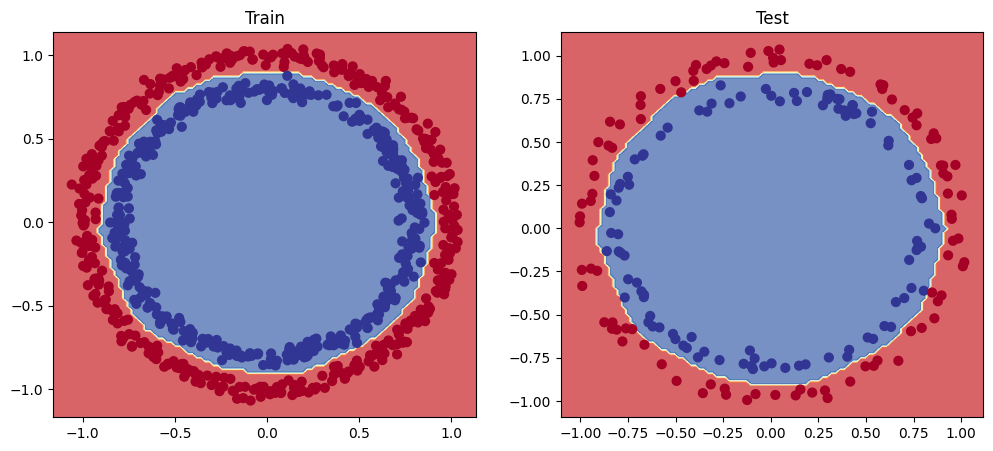

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)